In [22]:
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv  # those functions can be used directly
import numpy as np  # a package useful for numerical computations
import scipy.stats as st
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt   # all functions func in the package can be used as plt.func
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import os  # some terminal commands
import matplotlib #only needed to determine Matplotlib version number
import sklearn # sklearn is a popular statistical learning package; we use it to do linear regression
from sklearn import datasets 

# Enable inline plotting
%matplotlib inline

In [23]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Sklearn version ' + sklearn.__version__)

Python version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Matplotlib version 3.1.0
Sklearn version 0.21.2


# Import Data
We are going to import a dataset from sklearn. The dataset is about housing prices in Boston.

In [24]:
# sklearn has its own datasets
boston = datasets.load_boston()  
# The imported dataset is a dictionary
print(boston.keys())
# The dataset has 506 lines and 13 columns
print(boston.data.shape)
# The feature names
print(boston.feature_names)
# We can see the full description of the dataset using the following command
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [25]:
# Transform the sklearn datset (a dictionary) to pandas
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# The data key of boston only includes the data itself. So we add the feature names to the header
bos.columns = boston.feature_names
# boston.target contains the housing prices. We also add that to a column
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Simple Linear Regression

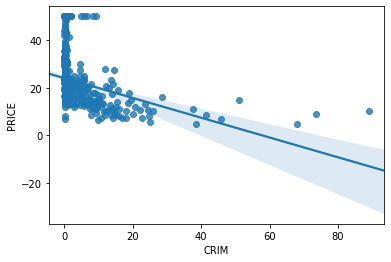

In [27]:
# Seaborn is a statistical data visualization package
import seaborn as sns
# Use seaborn to visualize the trend
sns.regplot(x="CRIM", y = "PRICE", data=bos)
plt.show()

In [28]:
# Import the object from linear_model
from sklearn.linear_model import LinearRegression
# Create an object
lm = LinearRegression()
# Fit PRICE and CRIM
# Here is another trick here. np.array(bos['CRIM']) returns a 1D array. But the coefficient matrix provided to lm.fit has to be 2D. So we use reshape to make it 2D.
lm.fit(X=np.array(bos['CRIM']).reshape(-1,1), y=bos['PRICE'])
# Report result
print('Intercept: ',  lm.intercept_)
print('Coefficient: ', lm.coef_)

Intercept:  24.03310617412388
Coefficient:  [-0.41519028]


In [29]:
# Import statsmodels to do the linear regression
import statsmodels.api as sm
# We need the intercept, so add a constant column
X = sm.add_constant(np.array(bos['CRIM']))
y = bos['PRICE']
# Fit the model using OLS (ordinary least square, as opposed to generalized least square)
lm1 = sm.OLS(y,X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.17e-19
Time:                        19:31:19   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

In [30]:
# Consider two observation of CRIM
test = np.array([0.005, 0.006])
test = sm.add_constant(test)
# Use the estimated lm1 object to predict PRICE for the new CRIM data
lm1.predict(test)

array([24.03103022, 24.03061503])

# Regression Diagnostics

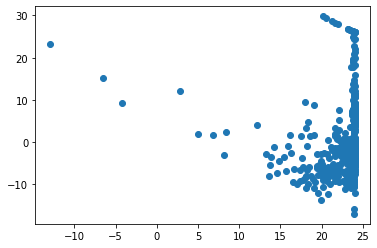

In [31]:
# The results object has an attribute resid, representing the residuals
residual = lm1.resid
fitted = lm1.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

The residuals do not seem to be i.i.d.; there is a downward trend in the fitted value. Next we check the QQ-plot (normal probability plot) for normality. Scipy has a function for that.

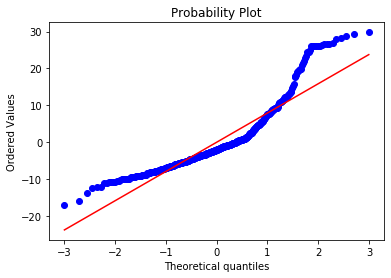

In [32]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

The normality assumption doesn't seem to be satisfied either.

# Multiple Linear Regression

In [37]:
# Specify the matrices
X = sm.add_constant(bos.drop('PRICE', axis = 1))
y = bos['PRICE']
lm2 = sm.OLS(y,X).fit()
# Show results
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        19:39:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [34]:
print(lm2.f_test('AGE = 0'))

<F test: F=array([[0.00274601]]), p=0.9582293092054368, df_denom=492, df_num=1>


In [35]:
print(lm2.f_test('RM = TAX = 0'))

<F test: F=array([[49.425045]]), p=2.7542160322818655e-20, df_denom=492, df_num=2>


# Regression diagonostics

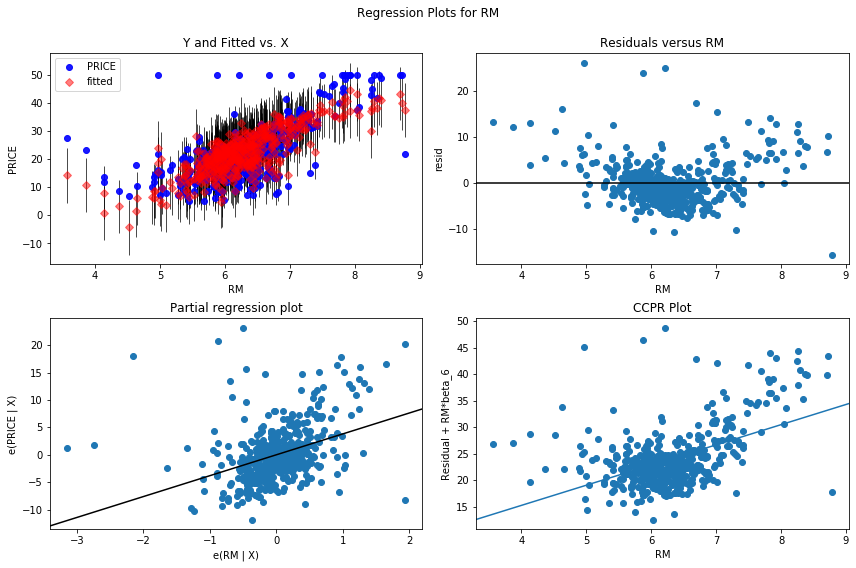

In [36]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm2, 'RM', fig=fig)
plt.show()